In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [69]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [71]:
col = ['petal_length', 'petal_width', 'species']
df.loc[:, col].head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [72]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [83]:
col = ['petal_length', 'petal_width']
X=df.loc[:,col]
X

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [84]:
species_to_num = {'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [85]:
df['tmp']= df['species'].map(species_to_num)
y = df['tmp']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: tmp, Length: 150, dtype: int64

In [86]:
C = 0.001
clf = svm.SVC(kernel='linear',C=C)
clf.fit(X,y)

SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [87]:
clf.predict([[6,2]])

array([2])

### Plotting

In [89]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy =np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

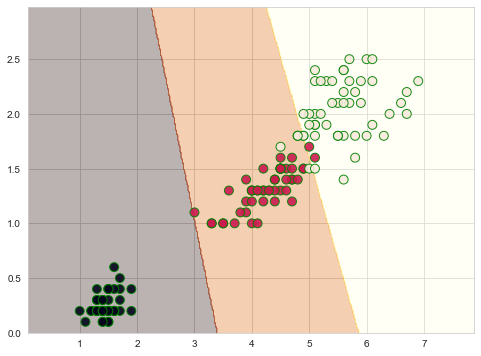

In [92]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.contourf(xx, yy, z, cmap='afmhot', alpha=0.3);
plt.scatter(X.values[:,0], X.values[:,1],c=y, s=80, alpha=0.9, edgecolors='g')

### Linear SVM implementation

In [95]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:,col]
species_to_num = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
df['tmp']= df['species'].map(species_to_num)
y = df['tmp']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=0)

### Scale features

In [96]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [97]:
C=1.0
clf = svm.SVC(kernel='linear',C=C)
clf.fit(X_std_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

### Cross Validation within Train Dataset

In [100]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average accuracy: \t {0:.4f}".format(np.mean(res)))
print("Average SD: \t {0:.4f}".format(np.std(res)))

Average accuracy: 	 0.9500
Average SD: 	 0.0553


In [101]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [102]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 34,  3],
       [ 0,  3, 41]])

In [103]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, y_train_pred, average='weighted')))
print("Recall Score: \t {0:.4f}".format(recall_score(y_train, y_train_pred, average='weighted')))
print("F1 Score: \t {0:.4f}".format(f1_score(y_train, y_train_pred, average='weighted')))

Precision Score: 	 0.9500
Recall Score: 	 0.9500
F1 Score: 	 0.9500


In [104]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv=3)

In [105]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]])

In [106]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, y_test_pred, average='weighted')))
print("Recall Score: \t {0:.4f}".format(recall_score(y_test, y_test_pred, average='weighted')))
print("F1 Score: \t {0:.4f}".format(f1_score(y_test, y_test_pred, average='weighted')))

Precision Score: 	 0.9422
Recall Score: 	 0.9333
F1 Score: 	 0.9290


## Polynomial Kernel

In [107]:
C = 1.0
clf = svm.SVC(kernel='poly',degree=3, C=C)
clf.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [108]:
clf.predict([[6,2]])

array([2])

In [109]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy =np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

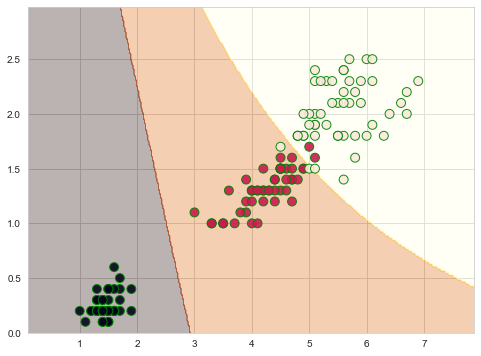

In [110]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.contourf(xx, yy, z, cmap='afmhot', alpha=0.3);
plt.scatter(X.values[:,0], X.values[:,1],c=y, s=80, alpha=0.9, edgecolors='g')

In [111]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:,col]
species_to_num = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
df['tmp']= df['species'].map(species_to_num)
y = df['tmp']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=0)

In [112]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [117]:
C=1.0
clf = svm.SVC(kernel='poly',degree=10, gamma='auto', C=C)
clf.fit(X_std_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=10, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [118]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average accuracy: \t {0:.4f}".format(np.mean(res)))
print("Average SD: \t {0:.4f}".format(np.std(res)))

Average accuracy: 	 0.7833
Average SD: 	 0.1404


In [119]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [120]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]])